In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy import Symbol, diff, solve, nsolve, solveset, latex, S, simplify, fraction, Union, Interval, intersection, limit
from sympy.calculus.util import continuous_domain
from sympy import sin as Sin
from sympy import cos as Cos
from sympy import pi as Pi
%matplotlib inline

## Занятие 8
## Математический анализ
## Дифференцирование функции, заданной параметрически
Пусть зависимость $y$ от $x$ задана параметрически:
$$
\left\{
\begin{matrix}
x = \varphi(t)\\
y = \psi(t)
\end{matrix}
\right.
$$
тогда производная $y$ по $x$  находится по формуле
$$
y'_x = \frac{y'_t}{x'_t} = \frac{\psi'_t}{\varphi'_t}
$$
Вторая производная:
$$
y''_{xx} = \frac{x'_t y''_{tt}-x''_{tt}y'_t}{(x'_t)^3}  = \frac{\varphi'_t \psi''_{tt}-\varphi''_{tt}\psi'_t}{(\varphi'_t)^3}
$$
### Задание 1
Найти производные 1 и 2 порядка функции 
$$
\left\{
\begin{matrix}
x = \sin(t) - t\cos(t)\\
y = \cos(t) + t\sin(t)
\end{matrix}
\right.
$$

In [ ]:
t = Symbol('t')
x = Sin(t) - t*Cos(t)
y = Cos(t) + t*Sin(t)
dx = diff(x, t)
dy = diff(y, t)
dy_x = dy/dx
dy2_xx = (dx*diff(y, t, 2) - diff(x, t, 2)*dy)/dx**3
display('Производная первого порядка:', dy_x,'Производная второго порядка:', dy2_xx)

dy2_xx = simplify(dy2_xx)
display('Упрощение производной 2 порядка', dy2_xx)

'Производная первого порядка:'

cos(t)/sin(t)

'Производная второго порядка:'

(t*(-t*sin(t) + cos(t))*sin(t) - t*(t*cos(t) + sin(t))*cos(t))/(t**3*sin(t)**3)

'Упрощение производной 2 порядка'

-1/(t*sin(t)**3)

### Задание 2.
Найти нули производных первого и второго порядка, а также точки, в которых эти производные не существуют, для функции
$$
\left\{
\begin{matrix}
x = t^2 - 2t\\
y = t^2 + 2t
\end{matrix}
\right.
$$

In [ ]:
t = Symbol('t')
x = t**2 - 2*t
y = t**2 + 2*t
dx = diff(x, t)
dy = diff(y, t)
dy_x = dy/dx
dy2_xx = (dx*diff(y, t, 2) - diff(x, t, 2)*dy)/dx**3
display('Производная первого порядка:', dy_x,'Производная второго порядка:', dy2_xx)

dy2_xx = simplify(dy2_xx)
display('Упрощение производной 2 порядка', dy2_xx)

# fraction - Разбивает отдельно числитель и знаменатель.
dy_x_num, dy_x_den = fraction(dy_x)
display('Разбиение 1 функции:', dy_x_num, dy_x_den)

dy_x_num_nul = solveset(dy_x_num)
dy_x_den_nul = solveset(dy_x_den)

display('Первая производная, нули числителя:', dy_x_num_nul, 'нули знаменателя:', dy_x_den_nul)
dy2_xx_num, dy2_xx_den = fraction(dy2_xx)

display('Разбиение 2 функции:', dy2_xx_num, dy2_xx_den)
dy2_xx_num_nul = solveset(dy2_xx_num)
dy2_xx_den_nul = solveset(dy2_xx_den)

display('Вторая производная, нули числителя:', dy2_xx_num_nul, 'нули знаменателя:', dy2_xx_den_nul)

'Производная первого порядка:'

(2*t + 2)/(2*t - 2)

'Производная второго порядка:'

-8/(2*t - 2)**3

'Упрощение производной 2 порядка'

-1/(t - 1)**3

'Разбиение 1 функции:'

2*t + 2

2*t - 2

'Первая производная, нули числителя:'

FiniteSet(-1)

'нули знаменателя:'

FiniteSet(1)

'Разбиение 2 функции:'

-1

(t - 1)**3

'Вторая производная, нули числителя:'

EmptySet

'нули знаменателя:'

FiniteSet(1)

### Задание 3. 
Найти точки экстремума и точки перегиба функции Задания 2.

In [13]:
# Объединение двух туплов.
crit_points = Union(dy_x_num_nul, dy_x_den_nul) 
crit_points = list(crit_points) 
crit_points.sort()

points = [-1.5] + [(crit_points[0] + crit_points[1])/2] + [1.5] 
display("Критические точки:", points)

max_arr=[]
min_arr=[]

for i, item in enumerate(crit_points):
    if item in dy_x_num_nul:
        df_left = dy_x.subs(t, points[i])
        df_right = dy_x.subs(t, points[i + 1])
        x_left = float(x.subs(t, points[i]))
        x_right = float(x.subs(t, points[i + 1]))
        if df_left < 0 and df_right > 0 and x_left < x_right or df_left > 0 and df_right < 0 and x_left > x_right:
            min_arr.append(item)
        elif df_left < 0 and df_right > 0 and x_left > x_right or df_left > 0 and df_right < 0 and x_left < x_right:
            max_arr.append(item) 
            
display('Минимум:', min_arr)
display('Максимум:', max_arr)

'Критические точки:'

[-1.5, 0, 1.5]

'Минимум:'

[-1]

'Максимум:'

[]

### Задание 4. Точки перегиба
Найти точки перегиба функции, график строить не нужно. 
$$
\left\{
\begin{matrix}
x = e^t\\
y = te^{2t}
\end{matrix}
\right.
$$

In [ ]:
t = Symbol('t')
x = sympy.exp(t)
y = t*sympy.exp(2*t)

dx = diff(x, t)
dy = diff(y, t)
dy_x = dy/dx

dy2_xx = ((dx*diff(y, t, 2) - diff(x, t, 2)*dy)/dx**3).simplify()
display(dy2_xx)

dy2_xx_null = solveset(dy2_xx)
dy2_xx_points = list(dy2_xx_null)
display(dy2_xx_points)

points = [-2, -1]

inflection=[]
for i, item in enumerate(dy2_xx_points):
    if item in dy2_xx_num_nul:
    df_left = dy2_xx.subs(t, points[i])
    df_right = dy2_xx.subs(t, points[i + 1])
    if df_left*df_right < 0:
        inflection.append(item)
    
display('Точки перегиба:', inflection)
print("x =", x.subs(t, inflection[0]))
print("y =", y.subs(t, inflection[0]))

2*t + 3

[-3/2]

'Точки перегиба:'

[-3/2]

x = exp(-3/2)
y = -3*exp(-3)/2


## Асимптоты параметрически заданной функции
Пусть зависимость $y$ от $x$ задана параметрически:
$$
\left\{
\begin{matrix}
x = \varphi(t)\\
y = \psi(t)
\end{matrix}
\right.
$$
Сначала нужно определить, нет ли таких значений параметра $t$, при которых одна из функций $\varphi(t)$ или $\psi(t)$ обращается в бесконечность, а другая остается конечной. При $\varphi(t_0) = \infty$, а $\psi(t_0) = c$ кривая имеет горизонтальную асимптоту  $y = c$. При  $\psi(t_0) = \infty$, а $\varphi(t_0) = c$ кривая имеет вертикальную асимптоту $x = c$. 

Если $\varphi(t_0) = \psi(t_0) = \infty$ и 
$$
\lim_{t\to t_0} \frac{\psi(t)}{\varphi(t)} = k;\qquad \lim_{t\to t_0} [\psi(t) - k\varphi(t)] = b,
$$
то   кривая имеет наклонную асимптоту  $y = kx + b$. 

### Индивидуальное задание.
Найти асимптоты параметрически заданной функции и изобразить на графике функцию и ее асимптоты.

Вариант 92

$x = 6 e^{t} + 6 e^{- t}$

$y = 2 e^{t} - 2 e^{- t}$
pou

't -> 0'

12

0

't -> +oo'

oo

oo

(0.0, 400.0)

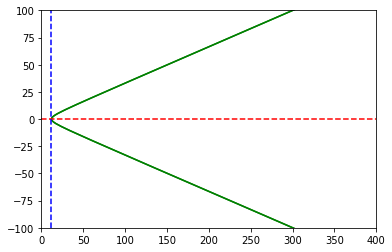

In [ ]:
t = Symbol('t')
x = 6*sympy.exp(t) + 6*sympy.exp(-t)
y = 2*sympy.exp(t) - 2*sympy.exp(-t)

display('t -> 0', limit(x, t, 0), limit(y, t, 0))
display('t -> +oo', limit(x, t, +sympy.oo), limit(y, t, +sympy.oo))

T1 = np.linspace(-100, 100, 1000)
T2 = np.linspace(-100, 100, 1000) 

for T in [T1, T2]:
    plt.plot(6*np.exp(T) + 6*np.exp(-T), 2*np.exp(T) - 2*np.exp(-T), color='green') 
    
plt.axhline(y=0, color='red', linestyle='--') 
plt.axvline(x=12, color='blue', linestyle='--')

plt.ylim(-100, 100)
plt.xlim(0, 400)